In [4]:
import tensorflow as tf
print(tf.__version__)

2.8.0-dev20211025


In [9]:
# Importing dataset from sklearn library.
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [14]:
# Learning target names
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [16]:
from sklearn.model_selection import train_test_split
import numpy as np

In [17]:
# Splitting data for test and train
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size= 0.3, random_state= 0)

In [25]:
print(f"Size of x train is {X_train.shape[0]} and size of x test is {X_test.shape[0]} .")

Size of x train is 398 and size of x test is 171 .


In [27]:
R, C = data.data.shape # R for rows and C for columns.

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
# Scaling process for better fitting.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
from keras.layers import Dense
from keras.models import Sequential

In [42]:
model = Sequential()

model.add(Dense(30, input_shape= (C,), activation= "relu"))

model.add(Dense(1, activation= "sigmoid"))
model.compile(optimizer="adam", loss= "binary_crossentropy", metrics=["accuracy"])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=80)

Epoch 1/80
13/13 [==============================] - 1s 17ms/step - loss: 0.8924 - accuracy: 0.5879 - val_loss: 0.6379 - val_accuracy: 0.6199
Epoch 2/80
13/13 [==============================] - 0s 6ms/step - loss: 0.6034 - accuracy: 0.6558 - val_loss: 0.4344 - val_accuracy: 0.7602
Epoch 3/80
13/13 [==============================] - 0s 6ms/step - loss: 0.4171 - accuracy: 0.8065 - val_loss: 0.3286 - val_accuracy: 0.8947
Epoch 4/80
13/13 [==============================] - 0s 5ms/step - loss: 0.3143 - accuracy: 0.8945 - val_loss: 0.2725 - val_accuracy: 0.9123
Epoch 5/80
13/13 [==============================] - 0s 5ms/step - loss: 0.2566 - accuracy: 0.9271 - val_loss: 0.2367 - val_accuracy: 0.9181
Epoch 6/80
13/13 [==============================] - 0s 6ms/step - loss: 0.2188 - accuracy: 0.9523 - val_loss: 0.2113 - val_accuracy: 0.9298
Epoch 7/80
13/13 [==============================] - 0s 5ms/step - loss: 0.1930 - accuracy: 0.9548 - val_loss: 0.1922 - val_accuracy: 0.9240
Epoch 8/80
13/13 [=

13/13 [==============================] - 0s 4ms/step - loss: 0.0455 - accuracy: 0.9899 - val_loss: 0.0770 - val_accuracy: 0.9883
Epoch 60/80
13/13 [==============================] - 0s 3ms/step - loss: 0.0449 - accuracy: 0.9899 - val_loss: 0.0775 - val_accuracy: 0.9883
Epoch 61/80
13/13 [==============================] - 0s 3ms/step - loss: 0.0443 - accuracy: 0.9899 - val_loss: 0.0770 - val_accuracy: 0.9883
Epoch 62/80
13/13 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9899 - val_loss: 0.0772 - val_accuracy: 0.9883
Epoch 63/80
13/13 [==============================] - 0s 4ms/step - loss: 0.0434 - accuracy: 0.9899 - val_loss: 0.0798 - val_accuracy: 0.9883
Epoch 64/80
13/13 [==============================] - 0s 3ms/step - loss: 0.0428 - accuracy: 0.9899 - val_loss: 0.0794 - val_accuracy: 0.9883
Epoch 65/80
13/13 [==============================] - 0s 4ms/step - loss: 0.0423 - accuracy: 0.9899 - val_loss: 0.0791 - val_accuracy: 0.9883
Epoch 66/80
13/13 [======

<function matplotlib.pyplot.legend(*args, **kwargs)>

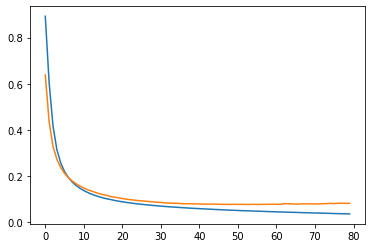

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(r.history["loss"], label= "loss")
plt.plot(r.history["val_loss"], label= "val_loss")
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

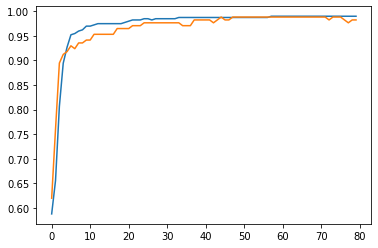

In [44]:
plt.plot(r.history["accuracy"], label= "accuracy")
plt.plot(r.history["val_accuracy"], label= "val_accuracy")
plt.legend

In [45]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

13/13 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9899
Train score: [0.03502920642495155, 0.9899497628211975]
6/6 [==============================] - 0s 3ms/step - loss: 0.0815 - accuracy: 0.9825
Test score: [0.081511490046978, 0.9824561476707458]


In [63]:
# creating a confusion matrix to evaluate our predict
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
conf = confusion_matrix(y_test, y_pred)
print(conf)

[[ 61   2]
 [  1 107]]


In [65]:

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(X_train, y_train)
y_pred2 = mlp.predict(X_test)

In [66]:
conf2 = confusion_matrix(y_pred2, y_test)
print(conf2)

[[ 60   3]
 [  3 105]]
